## Final Programming Part Problem 2: Fuel Efficiency Regression

This problem is one in which you will be examining the relationship between the horsepower of a car engine and its fuel efficiency. It will require you to get an overview of the data using a pairplot with the library seaborn. In addition you will need to remove rows with missing horsepower data ( represented as a "?") and then convert the strings to integers before performing the regression.

### 2.1 Importing cricical libraries

Import several libraries that will be used in the code, including NumPy, Pandas, Matplotlib, and Seaborn. You may want to use sklearn or scipy to get linear regression.

In [50]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

### 2.2 Read in the data from a url


Read in a CSV file containing data on car engines and their fuel efficiency, and stores the data in a Pandas DataFrame. From the following url:

https://bit.ly/data4mpg

using read_csv and store it in a variable called df.

In [28]:
df = pd.read_csv("https://bit.ly/data4mpg")

### 2.3 Exploritory Data Analysis

There are a few functions we use to understand the data we have. 

* We need to call a method on df to look at the first 5 rows
* We want to see the types of the the data in each column and see how many "nulls" there are and we can do that by calling another method on df.
* We want to see the basic statistics for each column so we can call a third method which will give us stats like the count, the mean, the std (standard deviation), the min ... etc.


In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [31]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 2.4 Fixing the horsepower column

This is a little bit trickly althoug only a couple of lines of code. If you select the "horsepower" column of the data frame and print it, you will see strings like "140". If you try right now to convert that column from string to int, it will break because there are a small number of rows that have "?" in them instead of a number. You need to exlude those rows .... somehow. The goal here is to get a new data frame with all the data in it, except that instead of having a column called "horsepower" you will have a new collumn called "num_horsepower" which has integers in it, indead of string so if it had "140" before, it has 140 instead. 

One way to do this (but not the only way) is to pull out just the horsepower column, and test if the values are not equal to "?" to get a numpy array which just has values "True" if that horsepower entry is not equal to "?" and False otherwise. Then you need to index just the rows of df which will have the effect of taking only those rows without a "?" in it. But remember when we change data frames we usually don't change the original data frame so you will overwrite (save to the same variable) df, with the result df.DataFrame(your code), which makes a new data frame. (in my code that was one line but if you do it right .. it could be as many as you need).

At this point you will have a new data frame which still has a column named "horsepower" but no "?", the bad rows were essentailly dropped. Dropna doesn't do it because pandas doesn't know "?" is not an "Nan". So the last part here is convert all the strings to ints. One can do this with a pandas function but I did it the old fashoned way. I created a numpy array with all the horsepower strings, I used a list comprehension (you could use a for loop or other things) to turn it into a list of "int" and then created a new column in "df" called num_horsepower and set it equal. 

In [40]:
df_new = df.rename(columns={'horsepower': 'num_horsepower'})
df_new

,mpg,cylinders,displacement,num_horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [41]:
df_new

,mpg,cylinders,displacement,num_horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### 2.5 Selecting the columns and doing a pair plot in seaborn

In order to see what is correlated with mpg, we are going to do a pair plot. First select out the variables 
'mpg', 'cylinders', 'displacement', 'num_horsepower', 'weight', 'acceleration' of df and save in a data frame called "focus_df". Next run a seaborn pair plot. 

Note: You may want to check the types of the columns to make sure that horsepower was converted correctly to int and is no longer strings otherwise it might not show up in the pairplot.

In [43]:
focus_df = df_new[df_new.columns[0:6]]
focus_df

,mpg,cylinders,displacement,num_horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


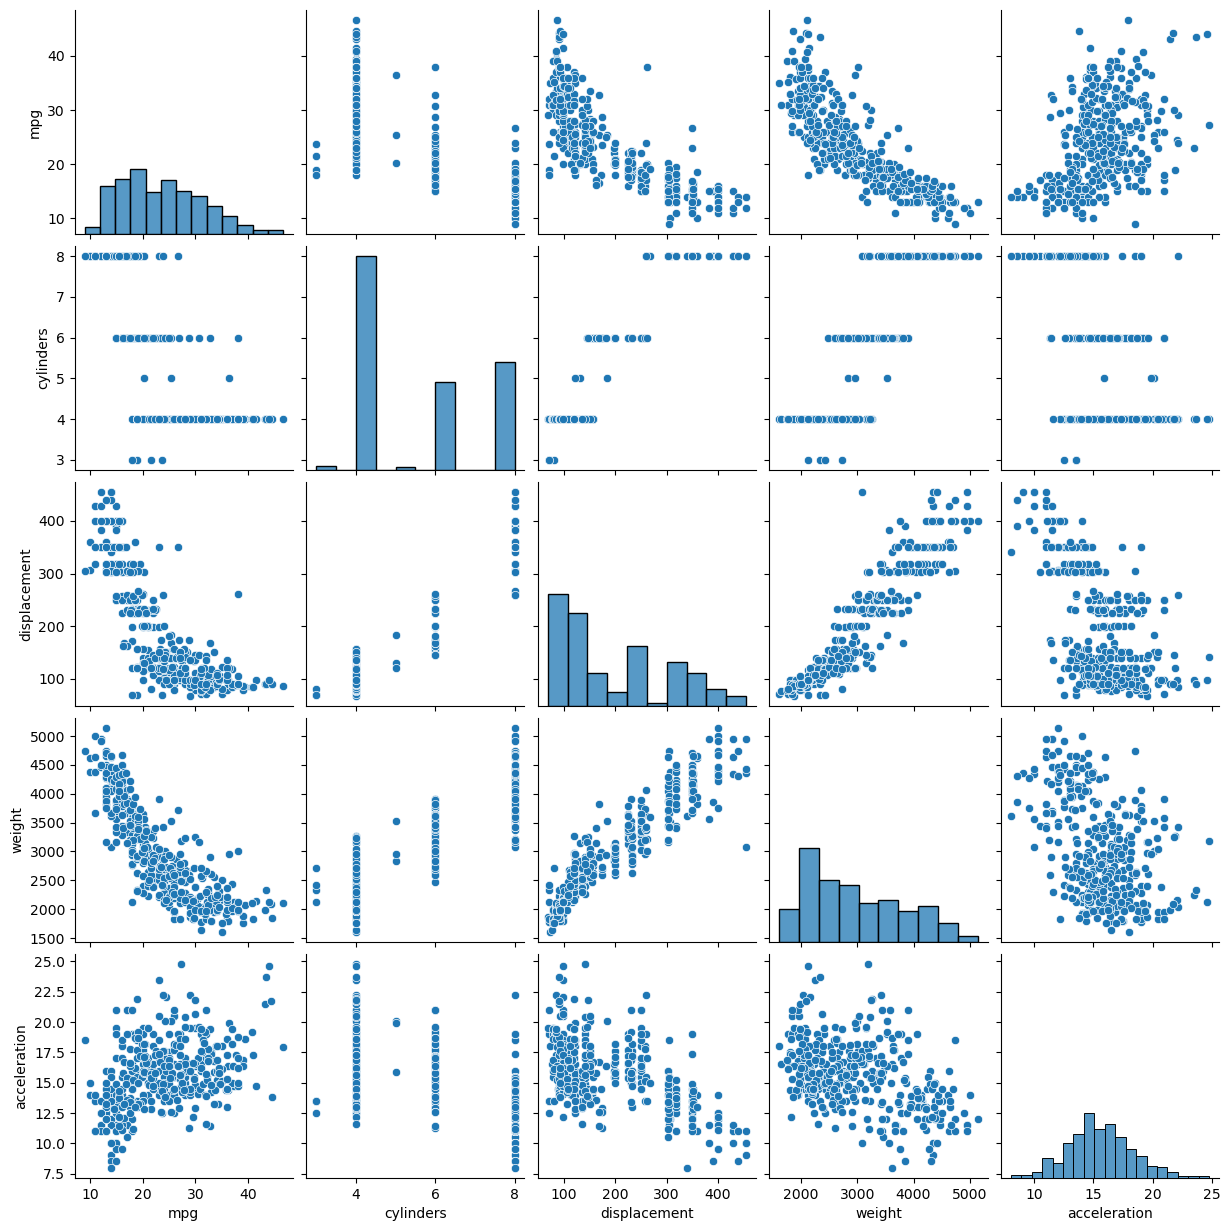

In [48]:
sns.pairplot(focus_df)

### 2.6 In this cell please explain whether, in comparison to other variables, how strongly does mpg seem to depend on horsepower? As horsepower increases what happens to mpg (fuel efficiency)?
----
* > mpg seems to depend heavily on horsepower and as horsepower increases the fuel efficiency decreases.
* > 
* > 
* > 
* > 
----

### 2.7 Extract the num_horsepower and mpg columns into numpy arrays for regression

You need to take the num_horsepower column and the mpg column and put them in their own numpy arrays. Call the extracted num_horspower column as a variable "horsepower" and the "mpg" column  "mpg"

In [52]:
horsepower = df.loc["num_horsepower"]
np.array[num_horsepower]
mpg = df.loc["mpg"]
np.array[mpg]

KeyError: 'num_horsepower'

### 2.8 Fit via linear regression

There are a couple of ways to fit a line (linear regression). As a hint you can use polynomial fitting in numpy (a line is a simple polynomial), or a linear regression model from sklearn or scipy. Anyway is ok. After you "fit" your linear model (should be one line of code), you are going to create a variable called "predicted_mpg". That is that you are going to evaluate your model (aka predict) on the "horsepower" variable and save that into "predicted_mpg".

In [51]:
predicted_mpg = LinearRegression()
predicted_mpg.fit(X_train, y_train['Horsepower'])

NameError: name 'X_train' is not defined

### 2.9 Compute the error

Here we are going to measure how well the model did. We are going to use the "root mean square error" or RMSE. What that means is that first you subtract the elements of "mpg" which is the "right answer" from "predicted_mpg" which is our model predictions. You do this as numpy arrays and then inside you have an array of these differences. Then we square them all ... you need to know how to square all the elements inside a numpy array. Note you do NOT need a loop. Next you want to take the "mean" and this is actually a method of a numpy array so that is one method you call. And finally you are going to take the square root of the result (which is a number) ... and a tip is you can used np.sqrt. You should get a single number. Print it. Not to ruin the surprise but it should be around 4.89.

In [ ]:
pass

### 2.10 Get the endpoitns for the line of best fit

In order to show the line we first need the numbers "minH" and "maxH" which are the max and min of the horsepower data. Remember we are trying to predict mpg from the horsepower with horsepower the x-axis and mpg the y-axis. We can just apply our prediction to those two numbers, minH, and maxH ... pass in a list or numpy array with just those two numbers ... and the output will be the prediction for those numbers. The good news here is because "model" is just a line, all we need minH, maxH which are two x-axis values and then the predicted values for those are the y-values at those points, and then we just connect them with a line. So find minH, maxH and the prediction for each which you can store in an array with two elements called "predict_max_min_mpg"

In [ ]:
pass

### 2.11 Plotting the result

Now we are ready to look at our great best fit line. Use seaborn scatterplot (or matplotlib scatter) to plot the raw data horsepower vs mpg and on the same axis (ax) use seaborn lineplot (or matplotlib plot) to just plot the minH,maxH for the x-axis, and predict_max_min_mpg for the y. It is importand that they show up in the same plot. Also make the line "red". Set the y-axis labeled "mpg" and the x-axis "horsepower". Also set a title that says "linear regression with RMSE" and then has the RMSE number we computed above.

In [ ]:
pass

### 2.12 Explain whether the horepower seems a good predictor for mpg and why

Put your explanation in this cell:
* >
* >
* >

In [ ]:
rubric="""
* 02pts Notebook should run without error
* 01pts Import all needed libraries 
* 01pts Load data from url
* 04pts Exploratory Data Analysis (show sample data, get types, get numerical stats)
* 04pts Fixing horsepower column, removing "?", converting to ints and putting back into dataframe
* 02pts Selecting columns and doing pair plot
* 02pts Interpret plots
* 01pts Extract variables to numpy
* 04pts Model/fit/predict to get predicted_mpg
* 02pts Compute RMSE
* 01pts Compute maxH and minH, get endpoints for line of best fit
* 04pts Plot scatter, plot line, label and make figure
* 02pts Interpret correctly
"""

thing = sum([int(line[2:4]) for line in rubric.split('\n') if line])
print(thing)